## 1. Correlaciones entre nombre y apellido

En la descripción de datos, hemos podido constatar que ciertas distribuciones eran fuertemente correlacionadas, particularmente los nombre y apellidos de las partes en los documentos. A continuación, trataremos de estimar el grado de correlación entre estas variables para definir si todas están necesarias en nuestro análisis.

https://fr.acervolima.com/test-de-correlation-python-pearson-entre-deux-variables/

### a. Empezaremos comparando las variables independientes sin diferenciar el tipo de documento

In [13]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import pearsonr

df = pd.read_excel('1_Descr_normal.xlsx', sheet_name='Transformados continuas', index_col=0)

list1 = df['X_apellido_actor']
list2 = df['X_nombre_actor']

corr, _ = pearsonr(list1, list2)
print(f'Coeficiente de correlación de Pearson para X_apellido_actor y X_nombre_actor: {corr: .3f}')

list1 = df['X_apellido_demandado']
list2 = df['X_nombre_demandado']

corr, _ = pearsonr(list1, list2)
print(f'Coeficiente de correlación de Pearson para X_apellido_demandado y X_nombre_demandado: {corr: .3f}')


list1 = df['X_apellido_otro']
list2 = df['X_nombre_otro']

corr, _ = pearsonr(list1, list2)
print(f'Coeficiente de correlación de Pearson para X_apellido_otro y X_nombre_otro: {corr: .3f}')

Coeficiente de correlación de Pearson para X_apellido_actor y X_nombre_actor:  0.925
Coeficiente de correlación de Pearson para X_apellido_demandado y X_nombre_demandado:  0.942
Coeficiente de correlación de Pearson para X_apellido_otro y X_nombre_otro:  0.930


Si aplicamos el coeficiente de correlación de Pearson para cada uno de estos conjuntos de datos, encontramos que es casi idéntico.

Sin embargo, no podemos concluir inmediatamente que si el coeficiente de correlación de Pearson es alto, entonces existe una relación lineal entre ellos. Sólo podremos agrupar las variables si se trata de una relación lineal, que ahora comprobaremos gráficamente.

https://www.geeksforgeeks.org/linear-regression-python-implementation/

Coeficientes estimados:
X_apellido_actor = 0.0006577754458830321 		
X_nombre_actor = 0.8646804496547732


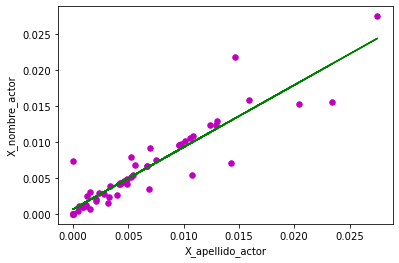

Coeficientes estimados:
X_apellido_demandado = 0.00040991511108850066 		
X_nombre_demandado = 0.8948501260519858


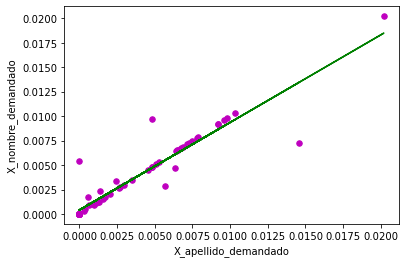

Coeficientes estimados:
X_apellido_otro = 0.0002699248157775765 		
X_nombre_otro = 0.8960754077807938


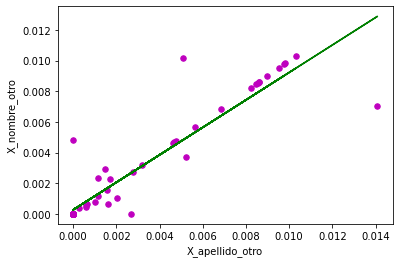

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
	# number of observations/points
	n = np.size(x)

	# mean of x and y vector
	m_x = np.mean(x)
	m_y = np.mean(y)

	# calculating cross-deviation and deviation about x
	SS_xy = np.sum(y*x) - n*m_y*m_x
	SS_xx = np.sum(x*x) - n*m_x*m_x

	# calculating regression coefficients
	b_1 = SS_xy / SS_xx
	b_0 = m_y - b_1*m_x

	return (b_0, b_1)

def plot_regression_line(x, y, b, l1, l2):
	# plotting the actual points as scatter plot
	plt.scatter(x, y, color = "m",
			marker = "o", s = 30)

	# predicted response vector
	y_pred = b[0] + b[1]*x

	# plotting the regression line
	plt.plot(x, y_pred, color = "g")

	# putting labels
	plt.xlabel(l1)
	plt.ylabel(l2)

	# function to show plot
	plt.show()

def main(x, y, l1, l2):
	# estimating coefficients
	b = estimate_coef(x, y)
	print("Coeficientes estimados:\n{} = {} \
		\n{} = {}".format(l1, b[0], l2, b[1]))

	# plotting regression line
	plot_regression_line(x, y, b, l1, l2)

list1 = df['X_apellido_actor']
list2 = df['X_nombre_actor']
main(list1, list2, 'X_apellido_actor', 'X_nombre_actor')

list1 = df['X_apellido_demandado']
list2 = df['X_nombre_demandado']
main(list1, list2, 'X_apellido_demandado', 'X_nombre_demandado')

list1 = df['X_apellido_otro']
list2 = df['X_nombre_otro']
main(list1, list2, 'X_apellido_otro', 'X_nombre_otro')


Observamos gráficamente que si bien las variables estan fuertemente correlacionadas, es deseable seguir tratandolas independientemente por la dispersión que tienen puesto que en ciertos casos tienen valores diferentes que pueden influir para discriminar entre un tipo de documento u otro. 

### b. Cálculo de la significación entre el número de las palabras y las diferentes variables independientes

Para determinar el valor de p asociado al coeficiente de correlación, se calcula el valor de t mediante la siguiente fórmula. A este valor t se le asocia un valor p en función del grado de libertad, al igual que en la prueba t. 

Para la correlación, no tenemos que realizar ningún cálculo particular para averiguar el tamaño del efecto. Sólo nos fijamos en el valor del coeficiente y lo interpretamos según las directrices de Cohen (1988):
- Alrededor de r = 0,30 e inferior >> Correlación Baja
- Alrededor de r = 0,50 >> Correlación media
- Alrededor de r = 0,70 y más >> Fuerte correlación

https://spss.espaceweb.usherbrooke.ca/correlation/

In [23]:
list2 = df['wcount']
n = 1
for i in df.columns:
    if i.startswith('X'):
        list1 = df[i]
        corr, _ = pearsonr(list1, list2)
        print(f'{n}. Coeficiente de correlación de Pearson para {i} y wcount: {corr: .3f}')
        n += 1

1. Coeficiente de correlación de Pearson para X_apellido_actor y wcount: -0.259
2. Coeficiente de correlación de Pearson para X_nombre_actor y wcount: -0.259
3. Coeficiente de correlación de Pearson para X_nombre_demandado y wcount: -0.228
4. Coeficiente de correlación de Pearson para X_apellido_demandado y wcount: -0.231
5. Coeficiente de correlación de Pearson para X_nombre_autorizado y wcount: -0.028
6. Coeficiente de correlación de Pearson para X_apellido_autorizado y wcount: -0.022
7. Coeficiente de correlación de Pearson para X_num_expediente y wcount: -0.312
8. Coeficiente de correlación de Pearson para X_nombre_otro y wcount: -0.223
9. Coeficiente de correlación de Pearson para X_apellido_otro y wcount: -0.208
10. Coeficiente de correlación de Pearson para X_num_juzgado y wcount: -0.242


Coeficientes estimados:
X_apellido_actor = 1544.7867893272446 		
wcount = -82167.23986072752


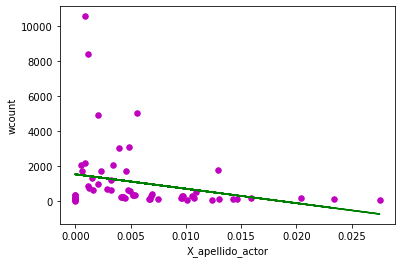

Coeficientes estimados:
X_nombre_actor = 1565.5234158896878 		
wcount = -87823.22384021062


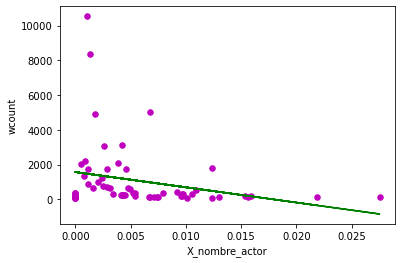

Coeficientes estimados:
X_nombre_demandado = 1448.2701305405083 		
wcount = -108341.16878493728


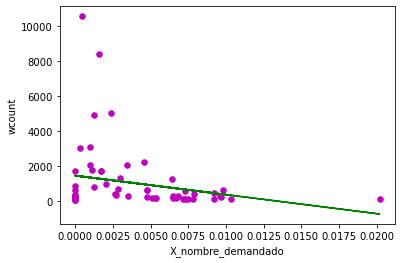

Coeficientes estimados:
X_apellido_demandado = 1429.6574483654372 		
wcount = -104144.06569090937


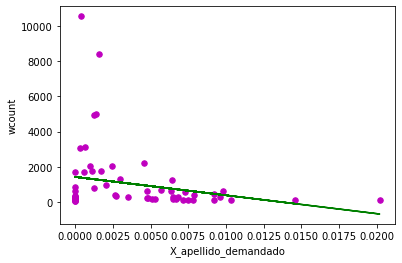

Coeficientes estimados:
X_nombre_autorizado = 1071.9238351796944 		
wcount = -2536.0688086668447


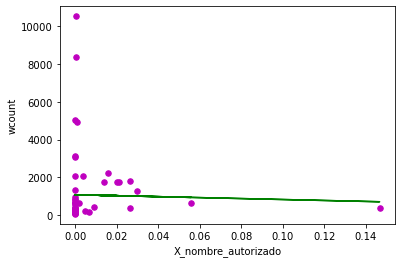

Coeficientes estimados:
X_apellido_autorizado = 1068.1841528158911 		
wcount = -2024.8650164495039


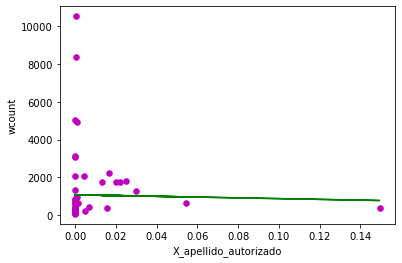

Coeficientes estimados:
X_num_expediente = 1514.1247058901483 		
wcount = -128547.7850469192


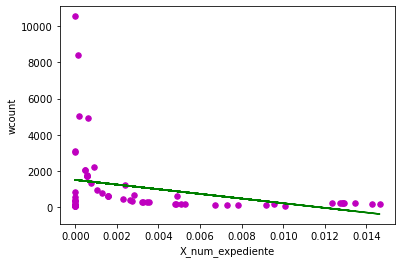

Coeficientes estimados:
X_nombre_otro = 1367.5981175552133 		
wcount = -117675.13512202584


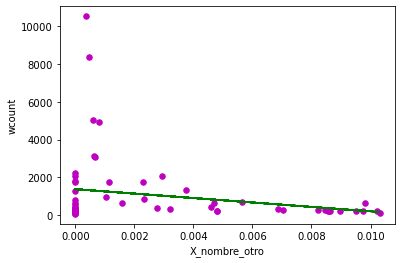

Coeficientes estimados:
X_apellido_otro = 1337.7031603796797 		
wcount = -106150.47524322232


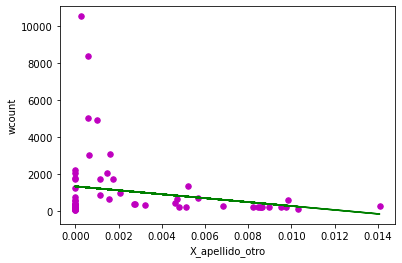

Coeficientes estimados:
X_num_juzgado = 1327.8710297291025 		
wcount = -45423.55812044283


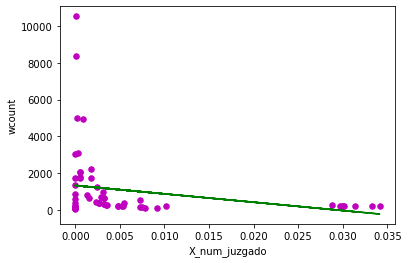

In [25]:
list2 = df['wcount']
n = 1
for i in df.columns:
    if i.startswith('X'):
        list1 = df[i]
        main(list1, list2, i, 'wcount')

Observamos que, excepto para el Número de expediente, el Coeficiente de correlación de Pearson indica una correlación negativa baja. Tendremos que interpretar los resultados con cautela puesto que la correlación tampoco es nula entre el número de palabras en un documento y la frecuencia de apariencia de un concepto de anonimización.